In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("hotel_bookings.csv")
df
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [2]:
df.dropna(subset=['lead_time'], inplace=True)

In [3]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [5]:
df['is_repeated_guest'].mode()[0]

0.0

In [7]:
df['is_repeated_guest']=df['is_repeated_guest'].fillna(df['is_repeated_guest'].mode()[0])
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [8]:
df['is_repeated_guest']=df['is_repeated_guest'].astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19995 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     19995 non-null  int64  
 1   deposit_type                    19995 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         19995 non-null  int64  
 4   stays_in_week_nights            19995 non-null  int64  
 5   is_repeated_guest               19995 non-null  int32  
 6   previous_cancellations          19995 non-null  int64  
 7   previous_bookings_not_canceled  19995 non-null  int64  
 8   booking_changes                 19995 non-null  int64  
 9   days_in_waiting_list            19995 non-null  int64  
 10  adr                             18932 non-null  float64
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 1.8+ MB


In [12]:
fill_mean_func=lambda g: g.fillna(g.mean())
df=df.groupby('deposit_type').apply(fill_mean_func)
df.index=df.index.droplevel(0)
df.isna().sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_14676/985658603.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fill_mean_func=lambda g: g.fillna(g.mean())


is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

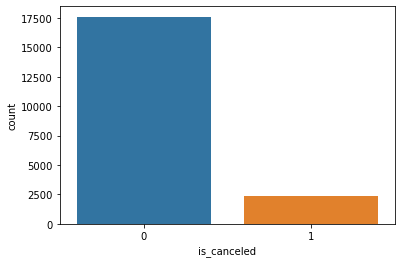

In [13]:
import seaborn as sns
sns.countplot(x='is_canceled', data=df)

In [17]:
df=pd.get_dummies(df)
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

X=df.drop(columns=['is_canceled'])
y=df['is_canceled']

start=time.time()
ros=RandomOverSampler(random_state=42)
X_ro, y_ro=ros.fit_resample(X, y)
print(time.time()-start)

start=time.time()
sm=SMOTE(random_state=42)
X_sm, y_sm=sm.fit_resample(X, y)
print(time.time()-start)

0.06762504577636719
0.20998501777648926


0.6871208084683148


C:\Users\taeeu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


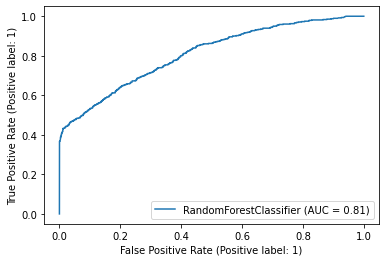

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

start=time.time()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
clf=RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
lr_pred=clf.predict(X_test)
print(roc_auc_score(y_test, lr_pred))
plot_roc_curve(clf, X_test, y_test)
plt.show()